In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import psycopg2
import psycopg2.extras 

In [2]:
# Расчет количества зарегистрировавшихся пользователей мае 2019
def getRegisteredUsersCount():
    query = '''SELECT r.registration_date, count(distinct(r.user_id)) as registered_users_count
    FROM case9.registration r
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

registered_users_count_5 = pd.DataFrame(getRegisteredUsersCount())

In [3]:
# Расчет количества зарегистрировавшихся пользователей июне 2019
def getRegisteredUsersCount():
    query = '''SELECT r.registration_date, count(distinct(r.user_id)) as registered_users_count
    FROM case9.registration r
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

registered_users_count_6 = pd.DataFrame(getRegisteredUsersCount())

In [4]:
# Преобразуем registration_date  в тип datetime
registered_users_count_5['registration_date'] = pd.to_datetime(registered_users_count_5['registration_date'])
registered_users_count_6['registration_date'] = pd.to_datetime(registered_users_count_6['registration_date'])

In [5]:
# Количество пользователей, зарегистрировавшихся в мае 2019
registered_users_count_5['registered_users_count'].sum()

188943

In [6]:
# Количество пользователей, зарегистрировавшихся в июне 2019
registered_users_count_6['registered_users_count'].sum()

100423

In [7]:
registered_users_count_5.head()

,registration_date,registered_users_count
0,2019-05-01,6516
1,2019-05-02,5309
2,2019-05-03,6266
3,2019-05-04,8639
4,2019-05-05,9787


In [8]:
registered_users_count_6.head()

,registration_date,registered_users_count
0,2019-06-01,4833
1,2019-06-02,5255
2,2019-06-03,4193
3,2019-06-04,4194
4,2019-06-05,3998


In [9]:
# Расчет количества активных пользователей в мае 2019
def getActiveUsersCountWithCohorts():
    query = '''SELECT ac.activity_date, r.registration_date, count(distinct(ac.user_id)) as active_users_count
    FROM case9.user_activity ac
    LEFT JOIN case9.registration r ON r.user_id = ac.user_id
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

active_users_count_with_cohorts_5 = pd.DataFrame(getActiveUsersCountWithCohorts())

In [10]:
# Расчет количества активных пользователей в июне 2019
def getActiveUsersCountWithCohorts():
    query = '''SELECT ac.activity_date, r.registration_date, count(distinct(ac.user_id)) as active_users_count
    FROM case9.user_activity ac
    LEFT JOIN case9.registration r ON r.user_id = ac.user_id
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

active_users_count_with_cohorts_6 = pd.DataFrame(getActiveUsersCountWithCohorts())

In [11]:
# Преобразуем даты в тип datetime
for col in ['activity_date','registration_date']:
    active_users_count_with_cohorts_5[col] = pd.to_datetime(active_users_count_with_cohorts_5[col])
for col in ['activity_date','registration_date']:
    active_users_count_with_cohorts_6[col] = pd.to_datetime(active_users_count_with_cohorts_6[col])
    

In [12]:
active_users_count_with_cohorts_5.head()

,activity_date,registration_date,active_users_count
0,2019-05-01,2019-05-01,2590
1,2019-05-02,2019-05-01,2146
2,2019-05-02,2019-05-02,2049
3,2019-05-03,2019-05-01,1637
4,2019-05-03,2019-05-02,1817


In [13]:
active_users_count_with_cohorts_6.head()

,activity_date,registration_date,active_users_count
0,2019-06-01,2019-06-01,1651
1,2019-06-02,2019-06-01,1429
2,2019-06-02,2019-06-02,1933
3,2019-06-03,2019-06-01,1021
4,2019-06-03,2019-06-02,1550


In [14]:
# Объединяем таблицы
retention_table_5 = active_users_count_with_cohorts_5.merge(registered_users_count_5,on=['registration_date'],how='left')
retention_table_5.head()

,activity_date,registration_date,active_users_count,registered_users_count
0,2019-05-01,2019-05-01,2590,6516
1,2019-05-02,2019-05-01,2146,6516
2,2019-05-02,2019-05-02,2049,5309
3,2019-05-03,2019-05-01,1637,6516
4,2019-05-03,2019-05-02,1817,5309


In [15]:
# Объединяем таблицы
retention_table_6 = active_users_count_with_cohorts_6.merge(registered_users_count_6,on=['registration_date'],how='left')
retention_table_6.head()

,activity_date,registration_date,active_users_count,registered_users_count
0,2019-06-01,2019-06-01,1651,4833
1,2019-06-02,2019-06-01,1429,4833
2,2019-06-02,2019-06-02,1933,5255
3,2019-06-03,2019-06-01,1021,4833
4,2019-06-03,2019-06-02,1550,5255


In [16]:
# Вычисляем показатель Retention Rate в отдельном столбце для мая 2019
retention_table_5['retention_rate'] = retention_table_5['active_users_count'] / retention_table_5['registered_users_count']
retention_table_5.head()

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate
0,2019-05-01,2019-05-01,2590,6516,0.397483
1,2019-05-02,2019-05-01,2146,6516,0.329343
2,2019-05-02,2019-05-02,2049,5309,0.385948
3,2019-05-03,2019-05-01,1637,6516,0.251228
4,2019-05-03,2019-05-02,1817,5309,0.342249


In [17]:
# Вычисляем показатель Retention Rate в отдельном столбце для июня 2019
retention_table_6['retention_rate'] = retention_table_6['active_users_count'] / retention_table_6['registered_users_count']
retention_table_6.head()

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate
0,2019-06-01,2019-06-01,1651,4833,0.341610
1,2019-06-02,2019-06-01,1429,4833,0.295676
2,2019-06-02,2019-06-02,1933,5255,0.367840
3,2019-06-03,2019-06-01,1021,4833,0.211256
4,2019-06-03,2019-06-02,1550,5255,0.294957


In [18]:
# Определим, какое количество дней прошло с момента регистрации до определённого дня активности 
retention_table_5['lifetime'] = retention_table_5['activity_date'] - retention_table_5['registration_date']
retention_table_6['lifetime'] = retention_table_6['activity_date'] - retention_table_6['registration_date']

In [19]:
# Приведем тип к целому числу
retention_table_5['lifetime'] = retention_table_5['lifetime']/np.timedelta64(1,'D')
retention_table_5['lifetime'] = retention_table_5['lifetime'].astype(int) 
retention_table_6['lifetime'] = retention_table_6['lifetime']/np.timedelta64(1,'D')
retention_table_6['lifetime'] = retention_table_6['lifetime'].astype(int) 


In [20]:
# Сформируем сводную таблицу май 2019
retention_pivot_5 = retention_table_5.pivot_table(index='registration_date',columns='lifetime',values='retention_rate',aggfunc='sum')
retention_pivot_5

lifetime,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
registration_date,,,,,,,,,,,,,,,,,,,,,
2019-05-01,0.397483,0.329343,0.251228,0.222683,0.198895,0.174954,0.153929,0.146255,0.133671,0.123082,...,0.072284,0.069828,0.068754,0.067219,0.067373,0.063536,0.062922,0.060773,0.043738,0.029619
2019-05-02,0.385948,0.342249,0.254285,0.219062,0.193633,0.164061,0.152006,0.140328,0.125071,0.117160,...,0.067056,0.059522,0.059898,0.061217,0.060652,0.058768,0.055943,0.053682,0.045018,0.031456
2019-05-03,0.381264,0.339291,0.256783,0.219438,0.188477,0.170124,0.148899,0.142834,0.132301,0.126716,...,0.071976,0.070859,0.072455,0.069103,0.067028,0.066550,0.063837,0.060166,0.046920,0.030961
2019-05-04,0.384651,0.335224,0.241232,0.191573,0.169348,0.150249,0.140178,0.137284,0.131728,0.116796,...,0.072925,0.071420,0.066906,0.065401,0.064012,0.061465,0.058456,0.057646,0.043176,0.029286
2019-05-05,0.383161,0.311944,0.227751,0.192398,0.170737,0.152549,0.145397,0.138755,0.121488,0.113518,...,0.067641,0.063962,0.061101,0.060693,0.058547,0.057014,0.053438,0.054256,0.043936,0.027179
2019-05-06,0.368205,0.312260,0.227748,0.191377,0.162809,0.147732,0.137680,0.130274,0.117445,0.105806,...,0.065997,0.062029,0.060045,0.055680,0.053829,0.050919,0.049597,0.048142,0.035048,0.021690
2019-05-07,0.366349,0.326020,0.239393,0.206808,0.172770,0.153251,0.142926,0.137280,0.124859,0.113405,...,0.070657,0.062591,0.063559,0.060816,0.058235,0.057106,0.057590,0.055815,0.041781,0.028392
2019-05-08,0.393985,0.328271,0.245564,0.198195,0.176241,0.156692,0.142707,0.132782,0.121353,0.110977,...,0.066316,0.063910,0.058195,0.056842,0.053534,0.053835,0.052632,0.048872,0.038496,0.026617
2019-05-09,0.377529,0.320909,0.236777,0.205183,0.180866,0.163649,0.147497,0.136138,0.124068,0.113774,...,0.067093,0.066205,0.061945,0.060703,0.058218,0.055201,0.053958,0.054846,0.045971,0.029464


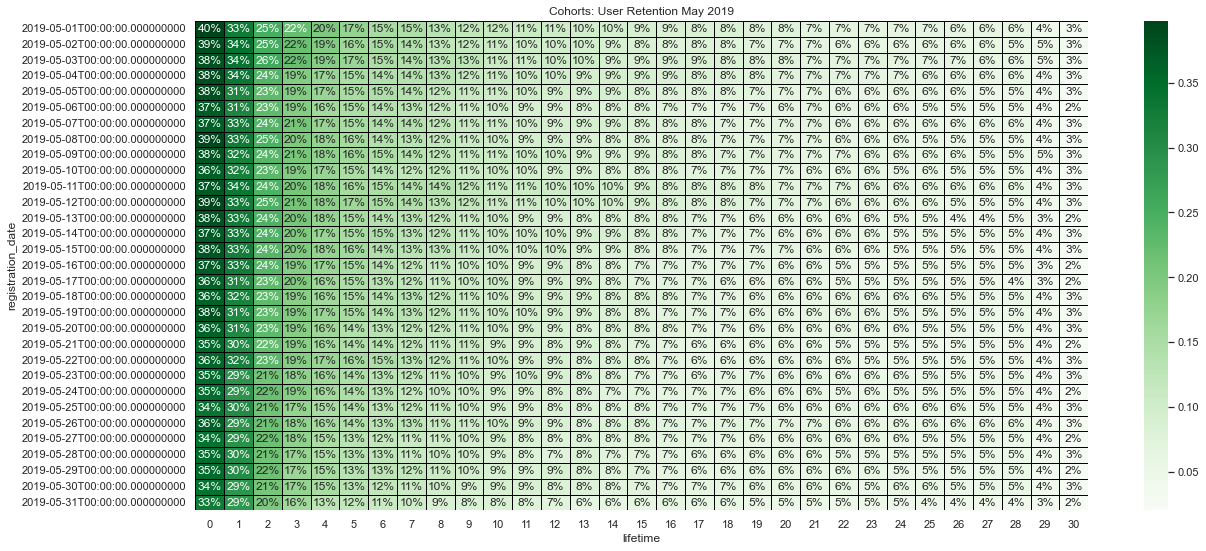

In [21]:
# Визуализируем с помощью heatmap в библиотеке seaborn
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='white')
plt.figure(figsize=(20, 9))
plt.title('Cohorts: User Retention May 2019')
sns.heatmap(retention_pivot_5, mask=retention_pivot_5.isnull(), annot=True, fmt='.0%', linewidths=0.5, linecolor='black', cmap="Greens");

In [22]:
# Сформируем сводную таблицу июнь 2019
retention_pivot_6 = retention_table_6.pivot_table(index='registration_date',columns='lifetime',values='retention_rate',aggfunc='sum')
retention_pivot_6

lifetime,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
registration_date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,0.341610,0.295676,0.211256,0.175667,0.143596,0.134906,0.121664,0.112766,0.110904,0.099938,...,0.060418,0.061246,0.058763,0.055245,0.056487,0.050693,0.049659,0.050693,0.042003,0.028968
2019-06-02,0.367840,0.294957,0.221313,0.188202,0.164225,0.145576,0.130923,0.129971,0.121598,0.109610,...,0.073073,0.071931,0.068506,0.062797,0.061656,0.062797,0.063178,0.060514,0.044719,0.028925
2019-06-03,0.341522,0.296685,0.207727,0.173384,0.150727,0.123062,0.118054,0.115430,0.111376,0.099213,...,0.065109,0.064870,0.063916,0.057238,0.056284,0.051753,0.052707,0.051991,0.041975,0.028858
2019-06-04,0.351216,0.296853,0.229852,0.180019,0.147592,0.133047,0.135670,0.121841,0.106581,0.098236,...,0.063662,0.060324,0.058417,0.053648,0.051502,0.051979,0.051264,0.047926,0.036242,0.023605
2019-06-05,0.337419,0.305403,0.223112,0.172336,0.147324,0.140570,0.131816,0.118059,0.108304,0.097799,...,0.066033,0.064282,0.060030,0.056278,0.054527,0.054527,0.053527,0.051026,0.037519,0.027514
2019-06-06,0.362845,0.306551,0.208802,0.178864,0.169396,0.141505,0.131013,0.117707,0.109519,0.098516,...,0.066018,0.063715,0.064483,0.057318,0.056551,0.055015,0.055527,0.055271,0.045803,0.030194
2019-06-07,0.370719,0.294691,0.219290,0.190386,0.171222,0.147345,0.129752,0.120955,0.108702,0.106189,...,0.068803,0.068803,0.068175,0.068175,0.063776,0.064719,0.062834,0.059692,0.045240,0.027961
2019-06-08,0.361902,0.330097,0.251423,0.204553,0.179444,0.156344,0.144961,0.141948,0.127218,0.116170,...,0.076666,0.071979,0.072648,0.071979,0.067626,0.066622,0.066622,0.065618,0.052896,0.037496
2019-06-09,0.363961,0.321811,0.234835,0.192685,0.165923,0.149643,0.143845,0.136039,0.118198,0.113069,...,0.081401,0.074710,0.071142,0.066905,0.068020,0.065343,0.066236,0.062444,0.049286,0.031891


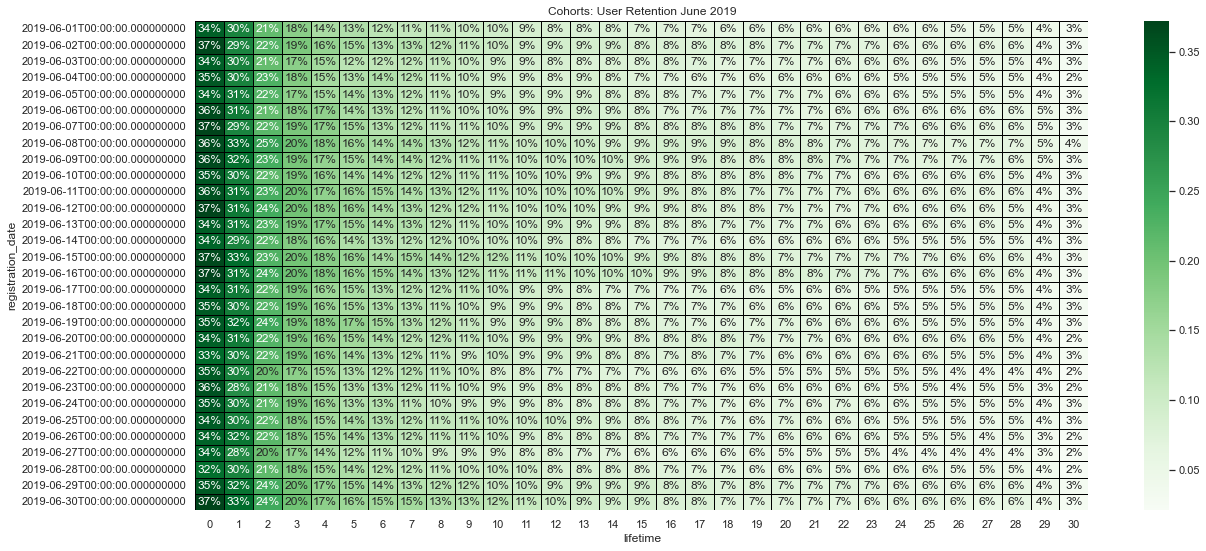

In [23]:
# Визуализируем с помощью heatmap в библиотеке seaborn
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='white')
plt.figure(figsize=(20, 9))
plt.title('Cohorts: User Retention June 2019')
sns.heatmap(retention_pivot_6, mask=retention_pivot_6.isnull(), annot=True, fmt='.0%', linewidths=0.5, linecolor='black', cmap="Greens");

<AxesSubplot:xlabel='registration_date'>

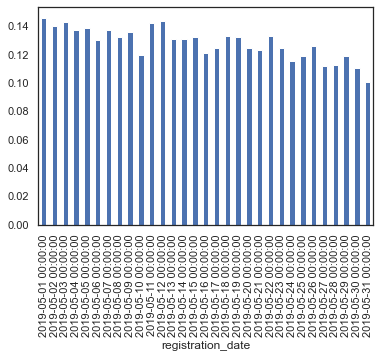

In [24]:
# Оценим изменение Retention Rate когорт на 7-ой день в мае 2019
retention_pivot_5[7].plot.bar()

<AxesSubplot:xlabel='registration_date'>

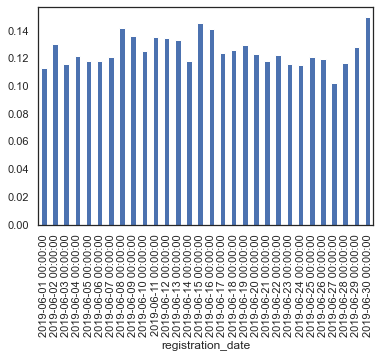

In [25]:
# Оценим изменение Retention Rate когорт на 7-ой день в июне 2019
retention_pivot_6[7].plot.bar()

In [26]:
#Найдём изменение Retention Rate на 7-ой день для когорты 31.05.2019 относительно когорты 01.05.2019
retention_pivot_5[7]['2019-05-31']/retention_pivot_5[7]['2019-05-01']

0.6889460885141001

In [27]:
#Найдём изменение Retention Rate на 7-ой день для когорты 30.06.2019 относительно когорты 01.06.2019
retention_pivot_6[7]['2019-06-30']/retention_pivot_6[7]['2019-06-01']

1.3244076718481195

Вывод: после внедрения фичи динамика Retention Rate 7-ого дня улучшилась, можно сделать вывод, что пользователям понравилась данная функция. 

In [28]:
# Расчет выручки по дням в разрезе когорт для пользователей, зарегистрировавшихся в мае 2019
def getRevenue():
    query = '''SELECT re.date, r.registration_date, count(distinct(re.user_id)) as users_count_with_revenue, sum(re.revenue) as revenue
    FROM case9.user_revenue re
    LEFT JOIN case9.registration r ON r.user_id = re.user_id
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

revenue_5 = pd.DataFrame(getRevenue())

In [29]:
# Расчет выручки по дням в разрезе когорт для пользователей, зарегистрировавшихся в июне 2019
def getRevenue():
    query = '''SELECT re.date, r.registration_date, count(distinct(re.user_id)) as users_count_with_revenue, sum(re.revenue) as revenue
    FROM case9.user_revenue re
    LEFT JOIN case9.registration r ON r.user_id = re.user_id
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

revenue_6 = pd.DataFrame(getRevenue())

In [30]:
# Преобразуем типы к datetime
for col in ['date','registration_date']:
    revenue_5[col] = pd.to_datetime(revenue_5[col])
for col in ['date','registration_date']:
    revenue_6[col] = pd.to_datetime(revenue_6[col])

In [31]:
revenue_5.head()

,date,registration_date,users_count_with_revenue,revenue
0,2019-05-01,2019-05-01,1672,2357.590
1,2019-05-02,2019-05-01,1420,514.679
2,2019-05-02,2019-05-02,1367,1629.140
3,2019-05-03,2019-05-01,1048,390.952
4,2019-05-03,2019-05-02,1164,533.608


In [32]:
revenue_6.head()

,date,registration_date,users_count_with_revenue,revenue
0,2019-06-01,2019-06-01,1082,1611.860
1,2019-06-02,2019-06-01,928,317.738
2,2019-06-02,2019-06-02,1257,1305.220
3,2019-06-03,2019-06-01,623,192.273
4,2019-06-03,2019-06-02,1008,554.859


In [33]:
# Расчет выручки, которую принесли пользователи, зарегистрировавшиеся в мае 2019
revenue_5['revenue'].sum()

121998.29795000001

In [34]:
# Расчет выручки, которую принесли пользователи, зарегистрировавшиеся в июне 2019
revenue_6['revenue'].sum()

79685.869277

In [35]:
# Меняем название колонки date на activity_date
revenue_5 = revenue_5.rename(columns={'date':'activity_date'})
revenue_6 = revenue_6.rename(columns={'date':'activity_date'})

In [36]:
# Объединяем таблицы
retention_table_with_revenue_5 = retention_table_5.merge(revenue_5,on=['registration_date','activity_date'],how='left')
retention_table_with_revenue_6 = retention_table_6.merge(revenue_6,on=['registration_date','activity_date'],how='left')

In [37]:
retention_table_with_revenue_5.head()

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue
0,2019-05-01,2019-05-01,2590,6516,0.397483,0,1672.0,2357.590
1,2019-05-02,2019-05-01,2146,6516,0.329343,1,1420.0,514.679
2,2019-05-02,2019-05-02,2049,5309,0.385948,0,1367.0,1629.140
3,2019-05-03,2019-05-01,1637,6516,0.251228,2,1048.0,390.952
4,2019-05-03,2019-05-02,1817,5309,0.342249,1,1164.0,533.608


In [38]:
retention_table_with_revenue_6.head()

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082.0,1611.860
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928.0,317.738
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257.0,1305.220
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623.0,192.273
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008.0,554.859


In [39]:
# Меняем пропущенные значения на 0 
for col in ['revenue','users_count_with_revenue']:
    retention_table_with_revenue_5[col] = retention_table_with_revenue_5[col].fillna(0)
for col in ['revenue','users_count_with_revenue']:
    retention_table_with_revenue_6[col] = retention_table_with_revenue_6[col].fillna(0)

In [40]:
# Расчет ARPPU май 2019
retention_table_with_revenue_5['arppu'] = retention_table_with_revenue_5['revenue']/retention_table_with_revenue_5['users_count_with_revenue']
retention_table_with_revenue_5.head()

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue,arppu
0,2019-05-01,2019-05-01,2590,6516,0.397483,0,1672.0,2357.590,1.410042
1,2019-05-02,2019-05-01,2146,6516,0.329343,1,1420.0,514.679,0.362450
2,2019-05-02,2019-05-02,2049,5309,0.385948,0,1367.0,1629.140,1.191763
3,2019-05-03,2019-05-01,1637,6516,0.251228,2,1048.0,390.952,0.373046
4,2019-05-03,2019-05-02,1817,5309,0.342249,1,1164.0,533.608,0.458426


In [41]:
# Расчет ARPPU июнь 2019
retention_table_with_revenue_6['arppu'] = retention_table_with_revenue_6['revenue']/retention_table_with_revenue_6['users_count_with_revenue']
retention_table_with_revenue_6.head()

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue,arppu
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082.0,1611.860,1.489704
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928.0,317.738,0.342390
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257.0,1305.220,1.038361
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623.0,192.273,0.308624
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008.0,554.859,0.550455


Text(0.5, 1.0, 'Динамика ARPPU в мае 2019')

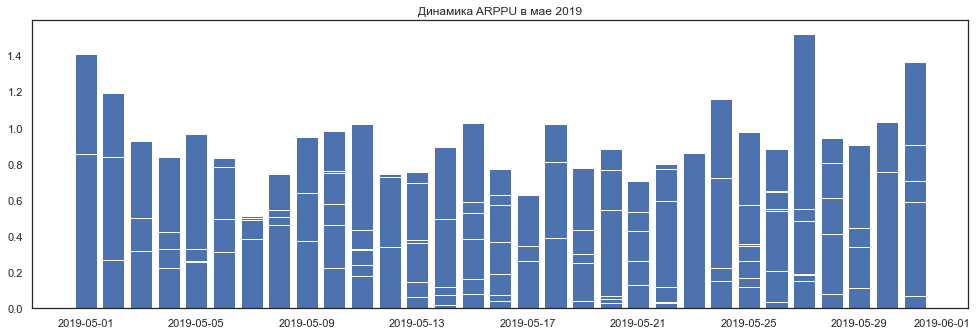

In [42]:
# Строим столбчатую диаграмму
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = retention_table_with_revenue_5['registration_date'], height = retention_table_with_revenue_5['arppu'])
axes.set_title('Динамика ARPPU в мае 2019')

Text(0.5, 1.0, 'Динамика ARPPU в июне 2019')

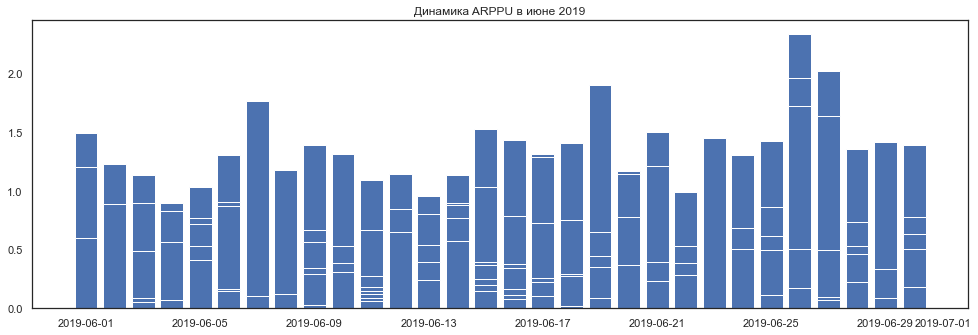

In [43]:
# Строим столбчатую диаграмму
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = retention_table_with_revenue_6['registration_date'], height = retention_table_with_revenue_6['arppu'])
axes.set_title('Динамика ARPPU в июне 2019')

Вывод: после внедрения фичи, динамика ARPPU заметно улучшилась, значение показателя выросло. Но необходим более детальный анализ, так как суммарная выручка, которую принесли пользователи зарегистрировавшиеся в июне, снизилась на 35% по сравнению с маем. А следовательно количество "платящих" пользователей снизилось. 